# Project: Wrangling and Analyze Data

### Table of Contents
- [Data Gathering](#Data-Gathering)
- [Assessing Data](#Assessing-Data)
- [Cleaning Data](#Cleaning-Data)
- [Storing Data](#Storing-Data)
- [Analyzing and Visualizing Data](#Analyze-Visualize-Data)

## Data Gathering <a class="anchor" id="Data-Gathering"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import tweepy

1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predictions_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
    
df_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# THIS CELL CONTAINS SENSITIVE KEYS FOR USE OF TWEEPY AND HAS BEEN REMOVED PRIOR TO UPLOAD

```
from timeit import default_timer as timer

# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the 
# Twitter archive

count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:

    # This loop will likely take 20-30 minutes to run because of
    # Twitter's rate limit
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
```

In [5]:
# Read the tweet-json.txt file into a dataframe.
tweet_list=[]
with open('tweet-json.txt') as json_file:
  for line in json_file:
    data = json.loads(line)
    tweet_dictionary = {
      'tweet_id': data['id'],
      'retweet_count': data['retweet_count'],
      'favorite_count': data['favorite_count'] 
    }
    tweet_list.append(tweet_dictionary)
df_likes_rts = pd.DataFrame(tweet_list)

## Assessing Data <a class="anchor" id="Assessing-Data"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
df_likes_rts

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [9]:
# View the structure and content values of df_archive.
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# View the structure and content values of df_predictions.
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# View the structure and content values of df_likes_rts.
df_likes_rts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [12]:
# View all columns which exist in multiple dataframes.
all_columns = pd.Series(list(df_archive) + list(df_predictions) + list(df_likes_rts))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

In [13]:
# View the amount of retweets in df_archive.
retweets = df_archive[df_archive['retweeted_status_id'].notnull()]
retweets.count()[0]

181

In [14]:
# View original tweets with a rating_denominator of zero in df_archive.
df_archive.loc[(df_archive.rating_denominator == 0) & (~df_archive.retweeted_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
# View original tweets in order of earliest dates in df_archive.
by_year = df_archive.loc[~df_archive.retweeted_status_id.isnull()]
by_year = by_year.sort_values('timestamp',ascending=False)
by_year

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [16]:
# View a list of unique name values in df_archive
df_archive['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
Buddy           7
Toby            7
an              7
Daisy           7
Milo            6
Leo             6
Scout           6
Jax             6
Jack            6
Oscar           6
Rusty           6
Koda            6
Stanley         6
Dave            6
Bella           6
Bentley         5
             ... 
Kanu            1
Acro            1
Brockly         1
Jangle          1
Kellogg         1
Patch           1
Taco            1
Herb            1
Colin           1
Wiggles         1
Yoda            1
Randall         1
Ralf            1
Tino            1
Striker         1
Koko            1
Kayla           1
Lucia           1
Thor            1
Godzilla        1
Laika           1
BeBe            1
Timber          1
Arlen           1
Rey       

### Quality Issues
#### df_archive
1. There are 181 non-original tweets which need to be excluded.
2. The `in_reply_to_status_id`, `in_reply_to_user_id`, `source` and `expanded_urls` columns do not provide useful information. 
3. The `name` column has entries which aren't names, and null values are listed as the `str` value "None".
4. The `tweet_id` column stores `int` type values instead of `str`.
5. The `timestamp` field stores `str` type values instead of `date`.

#### df_predictions
1. Several column names are difficult to understand.
2. The values entered in the `p1`, `p2` and `p3` columns have inconsistent capitalization and punctuation practices.
3. The `tweet_id` column stores `int` type values instead of `str`.

#### df_likes_rts
1. The `tweet_id` column stores `int` type values instead of `str`.

### Tidiness Issues
1. 181 tweets are missing from `df_predictions`, and two weets are missing from `df_likes_rts`.
2. The `df_archive` has one data type (dog stage) spread across four columns (`doggo`, `floofer`, `pupper`, `puppo`).
3. The `df_likes_rts` DataFrame provides little additional information and can be joined to the `df_archive` dataset.

## Cleaning Data <a class="anchor" id="Cleaning-Data"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
archive_clean = df_archive.copy()
predicts_clean = df_predictions.copy()
likes_rts_clean = df_likes_rts.copy()

### Tidiness Issues

### Issue #1: Missing tweets in `df_predictions`

#### Define: Remove all tweets which are not present across all three DataFrames.

#### Code

In [18]:
# Create a reference dataframe with tweet_id values found in all three dataframes.
shared_tweets = archive_clean[archive_clean['tweet_id'].isin(predicts_clean['tweet_id'])
                             & archive_clean['tweet_id'].isin(likes_rts_clean['tweet_id'])]
# Set all pieces of data to include only tweets belonging in shared_tweets
archive_clean = archive_clean[archive_clean['tweet_id'].isin(shared_tweets['tweet_id'])]
predicts_clean = predicts_clean[predicts_clean['tweet_id'].isin(shared_tweets['tweet_id'])]
likes_rts_clean = likes_rts_clean[likes_rts_clean['tweet_id'].isin(shared_tweets['tweet_id'])]

#### Test

In [19]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: float64(4), int64(3), objec

In [20]:
predicts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2073 non-null int64
jpg_url     2073 non-null object
img_num     2073 non-null int64
p1          2073 non-null object
p1_conf     2073 non-null float64
p1_dog      2073 non-null bool
p2          2073 non-null object
p2_conf     2073 non-null float64
p2_dog      2073 non-null bool
p3          2073 non-null object
p3_conf     2073 non-null float64
p3_dog      2073 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.0+ KB


In [21]:
likes_rts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
tweet_id          2073 non-null int64
dtypes: int64(3)
memory usage: 64.8 KB


### Issue #2: `df_archive` has four columns for one type of data

#### Define: Combine the `doggo`, `floofer`, `pupper` and `puppo` column values into one `dog_stage` column. Remove the `doggo`, `floofer`, `pupper` and `puppo` columns with the `drop` function.

#### Code

In [22]:
# Replace all values of 'None' with '' to better combine column strings.
archive_clean['doggo'].replace('None', '', inplace=True)
archive_clean['floofer'].replace('None', '', inplace=True)
archive_clean['pupper'].replace('None', '', inplace=True)
archive_clean['puppo'].replace('None', '', inplace=True)
# Combine the four columns into one dog_stage column.
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']
# Replace all blank entries with np.nan to reflect null entries.
archive_clean.loc[archive_clean['dog_stage']=='','dog_stage'] = np.nan
# Drop the original four columns.
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [23]:
archive_clean['dog_stage'].value_counts()

pupper          210
doggo            67
puppo            23
doggopupper      11
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

### Issue #3: The `df_likes_rts` DataFrame does not provide significant information to warrant its own table.

#### Define: Add the `df_likes_rts` DataFrame to the `df_archive` DataFrame using the `merge` function.

#### Code

In [24]:
merge_clean = archive_clean.merge(likes_rts_clean, on='tweet_id')

#### Test

In [25]:
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dog_stage                     320 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 275.3+ KB


### Quality Issues: `merge_clean`

### Issue #1: Non-original tweets need to be excluded.

#### Define: Remove all rows with non-null values in the `retweeted_status_id` and/or `retweeted_status_user_id` and/or `retweeted_status_timestamp` columns. Remove these columns afterwards with the `drop` function.

#### Code

In [26]:
# Remove all entries with non-null retweeted_status_id values.
merge_clean = merge_clean[merge_clean['retweeted_status_id'].isnull()]
# Drop the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.
merge_clean = merge_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [27]:
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 13 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                306 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 218.1+ KB


### Issue #2: The `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, and `expanded_urls` columns are not useful.

#### Define: Remove the `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, and `expanded_urls` columns using the `drop` function.

#### Code

In [28]:
# Drop the four columns.
merge_clean = merge_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'expanded_urls'], axis=1)

#### Test

In [29]:
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 9 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: int64(5), object(4)
memory usage: 155.8+ KB


### Issue #3: The `name` column contains invalid values, and entries with value "None" should be null.

#### Define: Substitute invalid and "None" entry values with `np.nan`.

#### Code

In [30]:
# Locate and store all invalid names into a list.
invalid_names = ~merge_clean['name'].isna() & merge_clean['name'].str.islower()
# Set invalid and 'None' values to np.nan.
merge_clean.loc[invalid_names, 'name'] = np.nan
merge_clean.loc[merge_clean['name']=='None', 'name'] = np.nan

#### Test

In [31]:
merge_clean['name'].value_counts()

Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
Bella         6
Stanley       6
Bo            6
Koda          6
Jax           6
Chester       5
Bailey        5
Leo           5
Milo          5
Louis         5
Buddy         5
Dave          5
Scout         5
Oscar         5
Rusty         5
Bentley       4
Reggie        4
Clarence      4
Brody         4
             ..
Timison       1
Tommy         1
Lupe          1
Dotsy         1
O             1
Snoop         1
Aiden         1
Stewie        1
Berkeley      1
Andru         1
Jersey        1
Staniel       1
Tycho         1
Ulysses       1
Charleson     1
Obi           1
Farfle        1
Tupawc        1
Craig         1
Ralpher       1
Arlo          1
Kathmandu     1
Brandy        1
Julio         1
Julius        1
Butter        1
Jaycob        1
Bobbay        1
Moofasa       1
Timofy        1
Name: name, Length: 913,

### Issue #4: The `tweet_id` column stores `int` values instead of `str`.

#### Define: Convert the `tweet_id` column from `int` to `str` of the same length using the `astype` function.

#### Code

In [32]:
# Convert the tweet_id column type.
merge_clean['tweet_id'] = merge_clean['tweet_id'].astype(str)

#### Test

In [33]:
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 9 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: int64(4), object(5)
memory usage: 155.8+ KB


### Issue #5: The `timestamp` column stores `str` values instead of `date`.

#### Define: Convert the `timestamp` column from `str` to `date` using the `pd.to_datetime` function.

#### Code

In [34]:
# Convert the timestamp column to date.
merge_clean['timestamp'] = pd.to_datetime(merge_clean['timestamp'])

#### Test

In [35]:
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 9 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 155.8+ KB


### Quality Issues: `predicts_clean`

### Issue #1: Several column names are difficult to understand.

#### Define: Use the `rename` function to give the columns better legibility.

#### Code

In [36]:
# Rename the p(n) columns to prediction_(n).
predicts_clean = predicts_clean.rename(columns={'p1':'prediction_1'})
predicts_clean = predicts_clean.rename(columns={'p2':'prediction_2'})
predicts_clean = predicts_clean.rename(columns={'p3':'prediction_3'})
# Rename the p(n)_conf columns to p(n)_confidence.
predicts_clean = predicts_clean.rename(columns={'p1_conf':'p1_confidence'})
predicts_clean = predicts_clean.rename(columns={'p2_conf':'p2_confidence'})
predicts_clean = predicts_clean.rename(columns={'p3_conf':'p3_confidence'})
# Rename the img_num column to img_count.
predicts_clean = predicts_clean.rename(columns={'img_num':'img_count'})

#### Test

In [37]:
predicts_clean.head()

,tweet_id,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: Values in the `prediction_1`, `prediction_2` and `prediction_3` columns have inconsistent punctuation issues.

#### Define: Apply the same formatting and punctuation practices to all values in `prediction_1`, `prediction_2`, and `prediction_3`.

#### Code

In [38]:
# Import string to apply the lamda expression.
import string
# Replace any _ characters with a space.
predicts_clean['prediction_1'] = predicts_clean['prediction_1'].replace('_', ' ', regex=True)
predicts_clean['prediction_2'] = predicts_clean['prediction_2'].replace('_', ' ', regex=True)
predicts_clean['prediction_3'] = predicts_clean['prediction_3'].replace('_', ' ', regex=True)
# Capitalize the first letter of each word.
predicts_clean['prediction_1'] = predicts_clean['prediction_1'].apply(lambda x: string.capwords(x))
predicts_clean['prediction_2'] = predicts_clean['prediction_2'].apply(lambda x: string.capwords(x))
predicts_clean['prediction_3'] = predicts_clean['prediction_3'].apply(lambda x: string.capwords(x))

#### Test

In [39]:
predicts_clean.head()

,tweet_id,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #3: The `tweet_id` column stores `int` values instead of `str`.

#### Define: Convert the `tweet_id` column from `int` to `str` of the same length using the `astype` function.

#### Code

In [40]:
# Convert the tweet_id column type.
predicts_clean['tweet_id'] = predicts_clean['tweet_id'].astype(str)

#### Test

In [41]:
predicts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2073 non-null object
jpg_url          2073 non-null object
img_count        2073 non-null int64
prediction_1     2073 non-null object
p1_confidence    2073 non-null float64
p1_dog           2073 non-null bool
prediction_2     2073 non-null object
p2_confidence    2073 non-null float64
p2_dog           2073 non-null bool
prediction_3     2073 non-null object
p3_confidence    2073 non-null float64
p3_dog           2073 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.0+ KB


### Reassessment

### Issue #1: Tweets in `predicts_clean` are missing in `merge_clean`.

#### Define: Remove all tweets in `predicts_clean` which aren't present in `merge_clean`.

#### Code

In [42]:
# Remove all tweets in predicts_clean which aren't in merge_clean.
predicts_clean = predicts_clean[predicts_clean['tweet_id'].isin(merge_clean['tweet_id'])]

#### Test

In [43]:
predicts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         1994 non-null object
jpg_url          1994 non-null object
img_count        1994 non-null int64
prediction_1     1994 non-null object
p1_confidence    1994 non-null float64
p1_dog           1994 non-null bool
prediction_2     1994 non-null object
p2_confidence    1994 non-null float64
p2_dog           1994 non-null bool
prediction_3     1994 non-null object
p3_confidence    1994 non-null float64
p3_dog           1994 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 161.6+ KB


### Issue #2: There are invalid values in `dog_stage`

#### Define: Replace combined values like `doggofloofer` to reflect multiple dog stages.

#### Code

In [44]:
# Change invalid dog_stage values to reflect multiple dog stages
# doggofloofer -> doggo, flooger; doggopupper -> doggo, pupper; doggopuppo -> doggo, puppo
merge_clean.loc[merge_clean['dog_stage']=='doggofloofer','dog_stage'] = 'doggo, floofer'
merge_clean.loc[merge_clean['dog_stage']=='doggopupper','dog_stage'] = 'doggo, pupper'
merge_clean.loc[merge_clean['dog_stage']=='doggopuppo','dog_stage'] = 'doggo, puppo'

#### Test

In [45]:
merge_clean['dog_stage'].value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

## Storing Data <a class="anchor" id="Storing-Data"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
df_master = merge_clean.merge(predicts_clean, on='tweet_id')
df_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data <a class="anchor" id="Analyze-Visualize-Data"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
df_master

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-haired Pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,NaN,NaN,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,NaN,NaN,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [48]:
top_p1 = df_master.sort_values('p1_confidence', ascending=False).head(10)
top_p1

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
1889,667866724293877760,2015-11-21 00:46:50,This is Shaggy. He knows exactly how to solve ...,10,10,Shaggy,NaN,3172,1110,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,Jigsaw Puzzle,1.000000,False,Prayer Rug,1.011300e-08,False,Doormat,1.740170e-10,False
698,752519690950500352,2016-07-11 15:07:30,Hopefully this puppo on a swing will help get ...,11,10,NaN,puppo,8157,3917,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,Swing,0.999984,False,Labrador Retriever,1.002880e-05,True,Eskimo Dog,1.434470e-06,True
767,745433870967832576,2016-06-22 01:50:58,This is Lenox. She's in a wheelbarrow. Silly d...,10,10,Lenox,doggo,7824,2894,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,Barrow,0.999962,False,Basset,1.448950e-05,True,Wok,6.060880e-06,False
1846,668636665813057536,2015-11-23 03:46:18,This is an Irish Rigatoni terrier named Berta....,10,10,NaN,NaN,1114,528,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,Komondor,0.999956,True,Llama,4.309810e-05,False,Ram,2.160900e-07,False
632,762464539388485633,2016-08-08 01:44:46,This is Buddy. His father was a bear and his m...,12,10,Buddy,NaN,11503,4839,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,Chow,0.999953,True,Tibetan Mastiff,2.335910e-05,True,Dhole,3.010330e-06,False
1765,670408998013820928,2015-11-28 01:08:55,This is Peanut. He was the World Table Tennis ...,10,10,Peanut,NaN,600,249,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,Ping-pong Ball,0.999945,False,Tennis Ball,1.763430e-05,False,Racket,1.470730e-05,False
1753,670449342516494336,2015-11-28 03:49:14,Vibrant dog here. Fabulous tail. Only 2 legs t...,5,10,NaN,NaN,1264,729,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,Peacock,0.999924,False,European Gallinule,2.987300e-05,False,Agama,2.150760e-05,False
563,776088319444877312,2016-09-14 16:00:49,I can't tap the screen to make the hearts appe...,10,10,NaN,NaN,2045,179,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,Web Site,0.999916,False,Pug,7.657020e-05,True,Menu,2.164680e-06,False
1948,666786068205871104,2015-11-18 01:12:41,Unfamiliar with this breed. Ears pointy af. Wo...,2,10,NaN,NaN,800,521,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,Snail,0.999888,False,Slug,5.514170e-05,False,Acorn,2.625800e-05,False
1130,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40...,44,40,NaN,NaN,3748,1552,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador Retriever,0.999885,True,Golden Retriever,9.758170e-05,True,Pug,8.267760e-06,True


In [49]:
top_p2 = df_master.sort_values('p2_confidence', ascending=False).head(10)
top_p2

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
1009,707693576495472641,2016-03-09 22:24:31,This is Jiminus. He's in a tub for some reason...,7,10,Jiminus,NaN,3765,1133,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,Bathtub,0.499525,False,Tub,0.488014,False,Washbasin,0.009298,False
299,825026590719483904,2017-01-27 17:04:02,Say hello to Pablo. He's one gorgeous puppo. A...,12,10,Pablo,puppo,7020,1483,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo Dog,0.524454,True,Siberian Husky,0.467678,True,Malamute,0.004976,True
504,786664955043049472,2016-10-13 20:28:35,"""Honestly Kathleen I just want more Ken Bone"" ...",12,10,NaN,NaN,11957,2996,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,Keeshond,0.464816,True,Pomeranian,0.007812,True
1763,670417414769758208,2015-11-28 01:42:22,Sharp dog here. Introverted. Loves purple. Not...,6,10,NaN,NaN,604,350,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,Sea Urchin,0.493257,False,Porcupine,0.460565,False,Cardoon,0.008146,False
1921,667211855547486208,2015-11-19 05:24:37,This is Genevieve. She is a golden retriever c...,9,10,Genevieve,NaN,516,258,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,Golden Retriever,0.462556,True,Labrador Retriever,0.454937,True,Kuvasz,0.024193,True
1894,667793409583771648,2015-11-20 19:55:30,Dogs only please. Small cows and other non can...,8,10,NaN,NaN,736,358,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,Dalmatian,0.535073,True,English Setter,0.451219,True,Great Dane,0.008164,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
590,771380798096281600,2016-09-01 16:14:48,Meet Fizz. She thinks love is a social constru...,11,10,Fizz,NaN,11746,5912,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,Collie,0.503728,True,Border Collie,0.450944,True,English Springer,0.012693,True
1183,692530551048294401,2016-01-28 02:12:04,Say hello to Cody. He's been to like 80 countr...,10,10,Cody,NaN,2021,474,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian Husky,0.486428,True,Eskimo Dog,0.448518,True,White Wolf,0.041506,False
1688,671533943490011136,2015-12-01 03:39:03,Super rare dog here. Spiffy mohawk. Sharp mout...,6,10,NaN,NaN,1092,631,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,Hen,0.556524,False,Cock,0.442033,False,Black Swan,0.001181,False


In [50]:
top_p3 = df_master.sort_values('p3_confidence', ascending=False).head(10)
top_p3

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
925,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN,2574,247,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian Husky,0.396495,True,Malamute,0.317053,True,Eskimo Dog,0.273419,True
916,718234618122661888,2016-04-08 00:30:51,This is Suki. She was born with a blurry tail ...,11,10,Suki,NaN,4217,1127,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,Malamute,0.370152,True,Siberian Husky,0.356398,True,Eskimo Dog,0.271042,True
1898,667728196545200128,2015-11-20 15:36:22,Meet Olive. He comes to spot by tree to remini...,11,10,Olive,NaN,398,162,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,Kuvasz,0.360159,True,Golden Retriever,0.293744,True,Labrador Retriever,0.270673,True
1872,668226093875376128,2015-11-22 00:34:50,Sneaky dog here. Tuba player has no clue. 10/1...,10,10,NaN,NaN,323,115,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,1,Trombone,0.390339,False,Cornet,0.314149,False,French Horn,0.255182,False
421,801958328846974976,2016-11-25 01:18:59,This is Ronnie. He hopes you're having a great...,12,10,Ronnie,NaN,8608,1992,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire Bullterrier,0.327887,True,American Staffordshire Terrier,0.271916,True,Labrador Retriever,0.247619,True
738,748692773788876800,2016-07-01 01:40:41,That is Quizno. This is his beach. He does not...,10,10,NaN,doggo,4659,1504,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,Ox,0.337871,False,Plow,0.269287,False,Oxcart,0.245653,False
1961,666428276349472768,2015-11-17 01:30:57,Here we have an Austrian Pulitzer. Collectors ...,7,10,NaN,NaN,171,90,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,Pembroke,0.371361,True,Chow,0.249394,True,Pomeranian,0.241878,True
308,822975315408461824,2017-01-22 01:12:59,This is Albus. He's soaked as h*ck. Seems to h...,12,10,Albus,NaN,19139,3958,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,Bathtub,0.331098,False,Tub,0.248860,False,Pembroke,0.233162,True
1539,674774481756377088,2015-12-10 02:15:47,This is Superpup. His head isn't proportional ...,11,10,Superpup,pupper,1213,532,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French Bulldog,0.309978,True,Siamese Cat,0.227677,False
1771,670319130621435904,2015-11-27 19:11:49,AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,11,10,NaN,NaN,4110,1359,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish Terrier,0.254856,True,Briard,0.227716,True,Soft-coated Wheaten Terrier,0.223263,True


In [51]:
top_retweets = df_master.sort_values('retweet_count', ascending=False).head(10)
top_retweets

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
775,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,10,NaN,doggo,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True
400,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,107015,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True
810,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13,10,NaN,doggo,75163,52360,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo Dog,0.503372,True,Siberian Husky,0.390413,True,Malamute,0.080901,True
309,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,NaN,puppo,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True
58,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,NaN,107956,45849,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English Springer,0.383404,True,Boston Bull,0.134967,True,Cardigan,0.110481,True
333,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14,10,Bo,doggo,95450,42228,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,0.351308,True,Toy Poodle,0.271929,True,Tibetan Terrier,0.094759,True
402,806629075125202948,2016-12-07 22:38:52,"""Good afternoon class today we're going to lea...",13,10,NaN,NaN,75639,37911,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian Camel,0.366248,False,House Finch,0.209852,False,Cocker Spaniel,0.046403,True
637,761672994376806400,2016-08-05 21:19:27,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,10,10,NaN,NaN,55016,33421,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,Gondola,0.318851,False,Sea Lion,0.306525,False,Pool Table,0.111565,False
108,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,106827,32883,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French Bulldog,0.905334,True,Boston Bull,0.078060,True,Pug,0.001771,True
1482,676219687039057920,2015-12-14 01:58:31,This is Kenneth. He's stuck in a bubble. 10/10...,10,10,Kenneth,NaN,67100,31989,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,Bubble,0.997556,False,Leafhopper,0.000159,False,Whippet,0.000132,True


In [52]:
most_likes = df_master.sort_values('favorite_count', ascending=False).head(10)
most_likes

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_count,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
309,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,NaN,puppo,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True
775,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,10,NaN,doggo,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True
58,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,NaN,107956,45849,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English Springer,0.383404,True,Boston Bull,0.134967,True,Cardigan,0.110481,True
400,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,107015,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True
108,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,106827,32883,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French Bulldog,0.905334,True,Boston Bull,0.078060,True,Pug,0.001771,True
333,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14,10,Bo,doggo,95450,42228,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,0.351308,True,Toy Poodle,0.271929,True,Tibetan Terrier,0.094759,True
93,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,13,10,Zoey,NaN,85011,27680,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden Retriever,0.841001,True,Great Pyrenees,0.099278,True,Labrador Retriever,0.032621,True
402,806629075125202948,2016-12-07 22:38:52,"""Good afternoon class today we're going to lea...",13,10,NaN,NaN,75639,37911,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian Camel,0.366248,False,House Finch,0.209852,False,Cocker Spaniel,0.046403,True
135,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,12,10,NaN,NaN,75193,25661,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False,Malamute,0.216163,True,Persian Cat,0.128383,False
810,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13,10,NaN,doggo,75163,52360,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo Dog,0.503372,True,Siberian Husky,0.390413,True,Malamute,0.080901,True


In [53]:
df_master.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo             19356.380952
doggo, floofer    17169.000000
doggo, pupper     12533.111111
doggo, puppo      47844.000000
floofer           13206.000000
pupper             7197.738916
puppo             21582.090909
Name: favorite_count, dtype: float64

In [54]:
df_master.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo              7125.698413
doggo, floofer     3433.000000
doggo, pupper      4083.444444
doggo, puppo      19196.000000
floofer            4968.714286
pupper             2363.581281
puppo              6473.954545
Name: retweet_count, dtype: float64

In [55]:
df_master.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo             11.888889
doggo, floofer    11.000000
doggo, pupper     11.000000
doggo, puppo      13.000000
floofer           12.000000
pupper            10.714286
puppo             12.000000
Name: rating_numerator, dtype: float64

In [56]:
df_master[~df_master['name'].isnull()]['name'].value_counts().count()

913

### Insights:
1. "Charlie" is the most common `name` with 11 counted among 913 unique names.

2. The highest `p3_confidence` estimates have greater similarity with `p1_confidence` and `p2_confidence`, whereas the highest `p2_confidence` estimates are less similar and the highest `p1_confidence` estimates have no similarity with 

3. Tweets with the `dog_stage` "doggo, puppo" have the highest average of `favorite_count`, `retweet_count`, and rating.

### Visualization

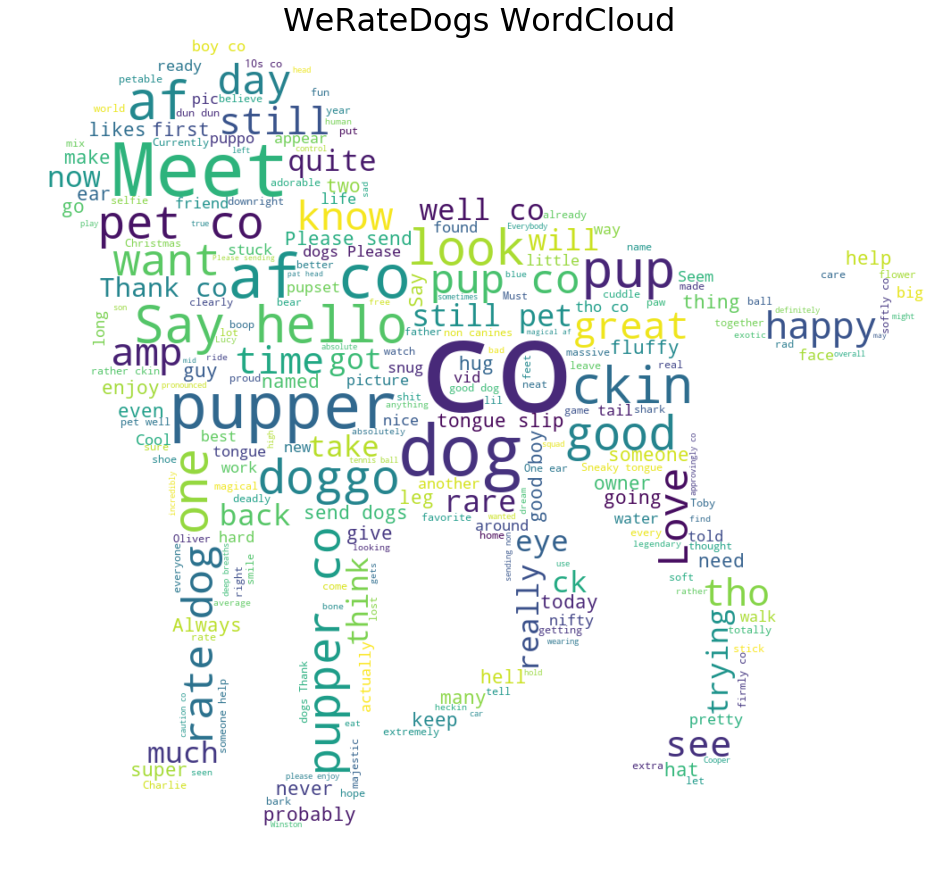

In [57]:
# For visualization generate a WordCloud.
# Import the proper packages.
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Concatenate all text from the `text` field to read into the WordCloud.
text = df_master.loc[:, 'text'].str.cat(others=None, sep=' ')
# Read the mask image the WordCloud will take shape of.
dog_mask = np.array(Image.open('dog-silhouette-1.png'))
# Add words to exclude from the WordCloud to stopwords.
stopwords = set(STOPWORDS)
words = ['https', 'enough', 'damn', 'nothing', 'tragic', 'stop', 'terrified', 'poor']
for word in words:
    stopwords.add(word)
# Generate the WordCloud using the information above.
wc = WordCloud(background_color='white', max_words=250, mask=dog_mask, stopwords=stopwords)
wc.generate(text)
# Show the WordCloud.
plt.figure(figsize=(16,16))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WeRateDogs WordCloud',fontsize=32)
plt.show();